# Loading images
Here we are going to resample image to illustrate the anisotropic thickness computation.
Note that the spacing parameter can also be passed to the simple `compute_thickness` function illustrated in the other notebook.

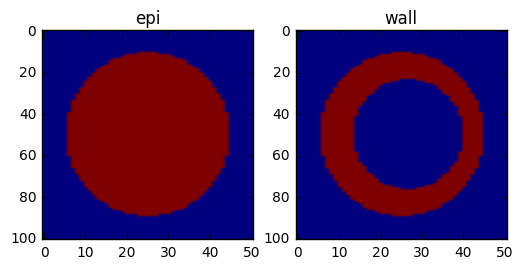

In [1]:
from skimage.io import imread
from matplotlib import pyplot as plt

epi = imread("epi.tif")[:,:,::2]
wall = imread("wall.tif")[:,:,::2]
s = 22

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(epi[s])
axarr[0].set_title("epi")
axarr[0].set_aspect(0.5)
axarr[1].imshow(wall[s])
axarr[1].set_title("wall")
axarr[1].set_aspect(0.5)
plt.show()

# Solving Laplacian

171 iterations, max_error = 0.0009985767068493739


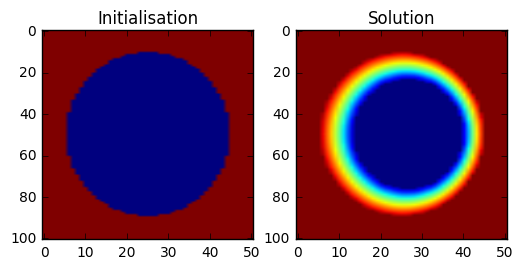

In [2]:
from pyezzi import laplace
init = np.zeros_like(wall, float)
init[np.logical_not(epi)] = 1
laplace_grid, iterations, max_error = laplace.solve_3D(wall,
                                                       init,
                                                       tolerance=0.001,
                                                       max_iterations=500,
                                                       spacing=np.array([1.0,1.0,2.0]))
print("{} iterations, max_error = {}".format(iterations, max_error))
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(init[s])
axarr[0].set_title("Initialisation")
axarr[0].set_aspect(0.5)
axarr[1].imshow(laplace_grid[s])
axarr[1].set_title("Solution")
axarr[1].set_aspect(0.5)
plt.show()

# Computing thickness
Using iterative relaxation

44 iterations, max_error = 0.0


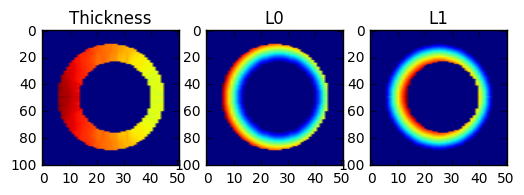

In [3]:
from pyezzi import yezzi
L0, L1, iterations, max_error = yezzi.iterative_relaxation_3D(wall,
                                                              laplace_grid,
                                                              tolerance=0,
                                                              max_iterations=500,
                                                              spacing=np.array([1.0,1.0,2.0]))
thickness = L0 + L1
print("{} iterations, max_error = {}".format(iterations, max_error))
f, axarr = plt.subplots(1, 3)
axarr[0].imshow(thickness[s])
axarr[0].set_title("Thickness")
axarr[1].imshow(L0[s])
axarr[1].set_title("L0")
axarr[2].imshow(L1[s])
axarr[2].set_title("L1")
for ax in axarr:
    ax.set_aspect(0.5)
plt.show()

max = 16.00000065308418, moy = 11.120337229951835, min = 8.000180898333124, std = 1.7540720127188218


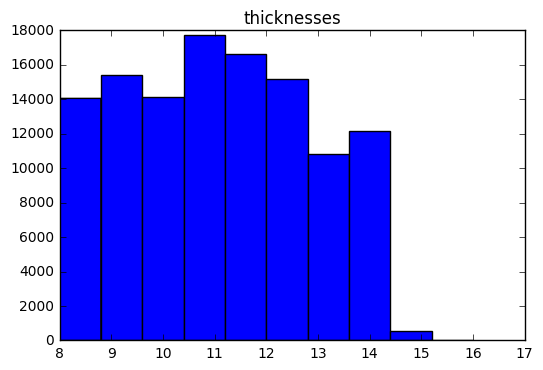

In [4]:
thickness_values = np.nan_to_num(thickness[wall.astype(bool)])

print("max = {}, moy = {}, min = {}, std = {}".format(thickness_values.max(),
                                                      thickness_values.mean(),
                                                      thickness_values.min(),
                                                      thickness_values.std()))
plt.hist(thickness_values)
plt.title("thicknesses")
plt.show()